<h3>IMPORTS</h3>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,SGDRegressor
from sklearn.metrics import r2_score

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
df =pd.read_csv('/content/CarPrice_Assignment.csv')

<h2>EXPLORATORY DATAT ANALYSIS</h2>

In [ ]:
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
print(df.describe())
print(df.info())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

<h4>The car dataset showcases a diverse range of vehicles, with wheelbases varying from compact 86.6 inches to spacious 120.9 inches, and car lengths ranging from 141.1 to 208.1 inches. The average horsepower is 104, indicating that most cars are moderately powered, with a significant spread from 48 to 288 horsepower. Prices span from dollar 5,118   to  45,400, reflecting a wide market range, while the average price is approximately $13,276, suggesting a concentration in the mid-range segment.The dataset also highlights variability in fuel efficiency, with city mileage ranging between 13 and 49 mpg, and highway mileage from 16 to 54 mpg. Overall, the data presents a balanced mix of economy, performance, and luxury vehicles, enabling detailed analysis across these dimensions.
<br><br>
<i>It is seen that there are no null values .</i></h4>

In [ ]:
df[['CarName_Brand', 'CarName_model']] = df['CarName'].str.split(' ', n=1, expand=True)
print(len(df['CarName_Brand'].unique()))
print(len(df['CarName_model'].unique()))

28
142


In [ ]:
df.drop(['CarName'], axis=1, inplace=True)

In [ ]:
dfx=df.copy(deep=True)
dfx.drop(['CarName_model'], axis=1, inplace=True)

In [ ]:
features = ["enginetype", "cylindernumber", "fuelsystem", "enginelocation", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel"]
for i in features:
  print(df[i].unique())

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['front' 'rear']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']


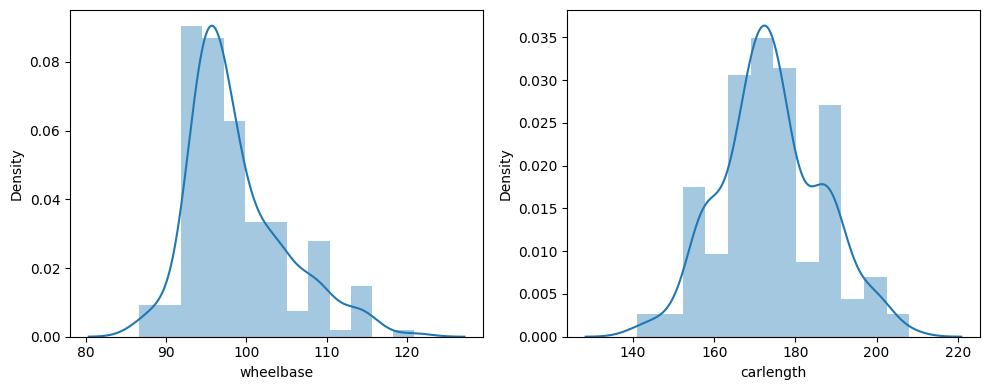

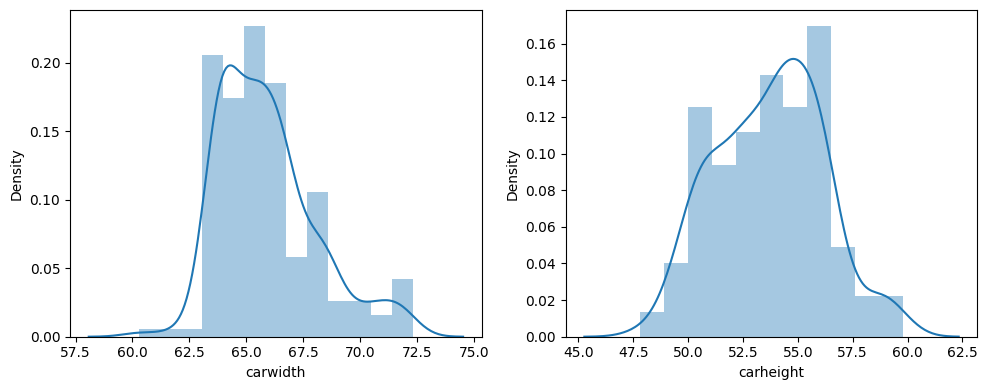

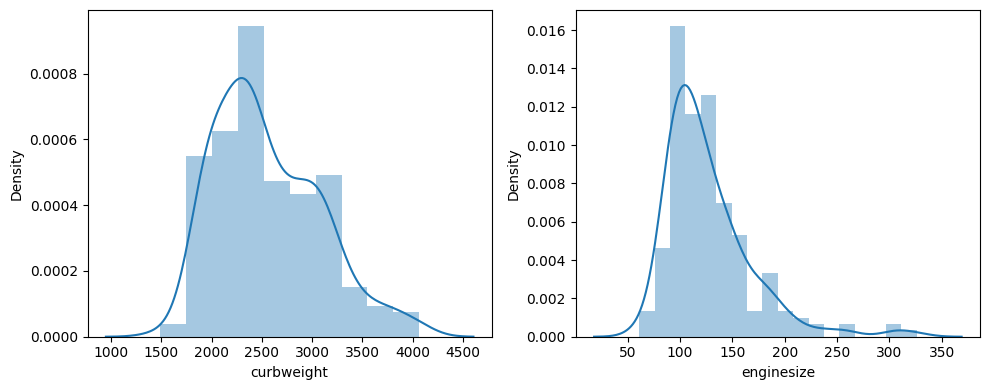

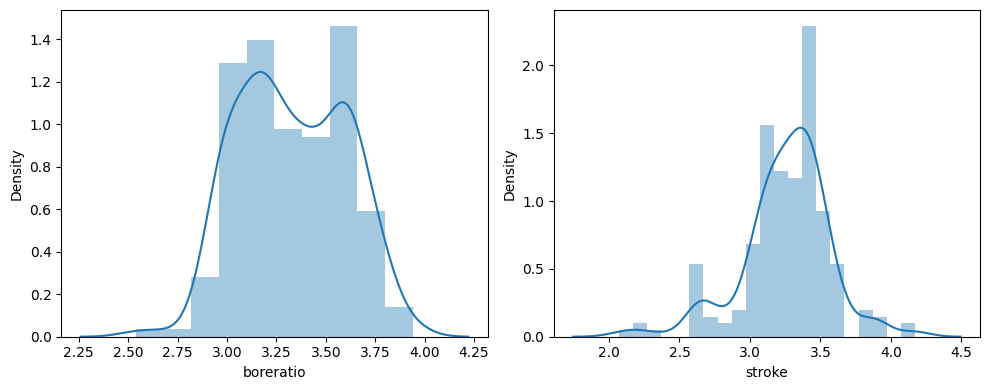

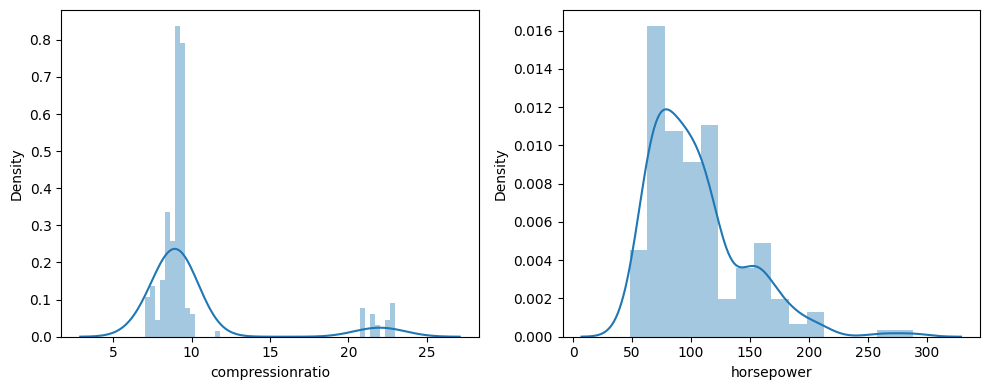

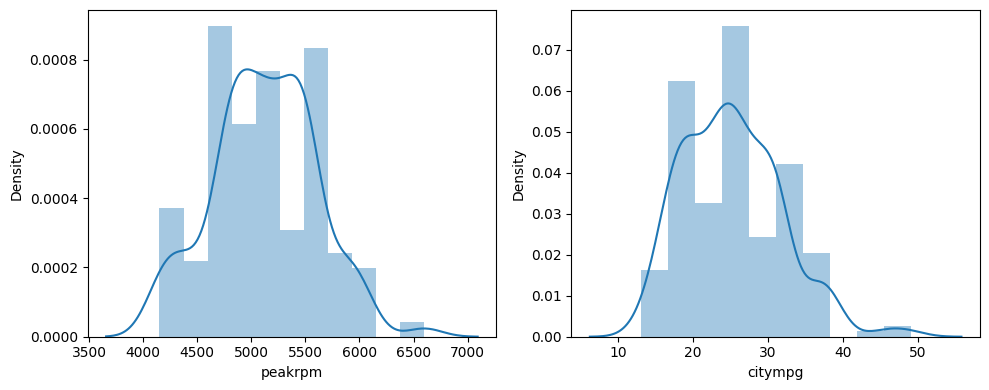

In [ ]:
num_cols = [ 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg',]
for i in range(0,len(num_cols)-1, 2):
 plt.figure(figsize=(10,4))
 plt.subplot(121)
 sns.distplot(df[num_cols[i]], hist=True, kde=True)
 plt.subplot(122)
 sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
 plt.tight_layout()
 plt.show()
 print('\n')

<ul>
        <li>
            The KDE of wheelbase:
                <p>The data is centered around a value between 95 and 105, showing a roughly symmetrical, unimodal distribution.The shape of the density curve indicates a slightly positively skewed distribution.</p>
        </li>
        <li>
            The KDE of carlength:
            <p>The data is centered around a value of approximately 170-180, showing a roughly symmetrical, unimodal distribution.The shape of the density curve also indicates a slightly positively skewed distribution, with a clearer peak visible.</p>
        </li>
        <li>
            The histogram of carwidth:
            <p>The distribution is roughly bell-shaped and centered around a value slightly above 65. It appears relatively symmetrical, with a slightly longer tail on the right side. The x-axis ranges from 57.5 to 75.</p>
        </li>
        <li>
            The histogram of carheight:
            <p>This distribution is also roughly bell-shaped, centered around a value closer to 55. It is relatively symmetrical and has a spread similar to the carwidth distribution. The x-axis ranges from 45 to 62.5.</p>
        </li>
         <li>
            The histogram of curbweight:
            <p>The distribution is slightly skewed, centered around approximately 2500-3000. The data is relatively concentrated in this range, with fewer values at the lower and higher ends.The x-axis ranges from approximately 1000 to 4000, and the y-axis represents density.</p>
        </li>
        <li>
            The histogram of enginesize:
            <p>This distribution is somewhat skewed, with the peak centrally located around 100-150. The data is clustered more tightly around this middle area and then tapers off toward both lower and higher engine sizes. The x-axis ranges from approximately 50 to 350, and the y-axis represents density. A smooth curve overlays the histogram to highlight the distribution.</p>
        </li>
        <li>
            The histogram of boreratio:
            <p>The distribution appears moderately bell-shaped, with the majority of the data centered around specific values, allowing the identification of peaks, valleys, and skewness.</p>
        </li>
        <li>
            The histogram of stroke:
            <p>The data shows a moderately bell-shaped distribution, centered around certain values, with clear visual indications of overall trends and patterns.</p>
        </li>
         <li>
            The density plot of compressionratio:
            <p>The distribution is roughly bell-shaped or Gaussian, centered around a value between 10 and 12. There is a distinct peak in this range, with the frequency of data points decreasing symmetrically as you move further away from the peak in both directions.</p>
        </li>
        <li>
            The density plot of horsepower:
            <p>This distribution also appears bell-shaped, with a peak concentrated between 75 and 100. The frequency of data points decreases gradually as you move toward both lower and higher horsepower values, showing a more gradual tapering compared to the compressionratio distribution.</p>
        </li>
         <li>
            The distribution of peakrpm:
            <p> The distribution is roughly bell-shaped, with a peak around 5500. The histogram displays the frequency of peakrpm values within specific ranges, overlaid with a smooth kernel density estimation curve. The light-blue-shaded areas represent the histogram, providing a visual summary of the distribution.</p>
        </li>
        <li>
            The distribution of citympg:
            <p>This distribution is also roughly bell-shaped, with a peak around 25. The histogram shows the frequency of citympg values within specific ranges, accompanied by a smooth kernel density estimation curve. The light-blue-shaded areas depict the histogram, summarizing the distribution visually.</p>
        </li>
  </ul>

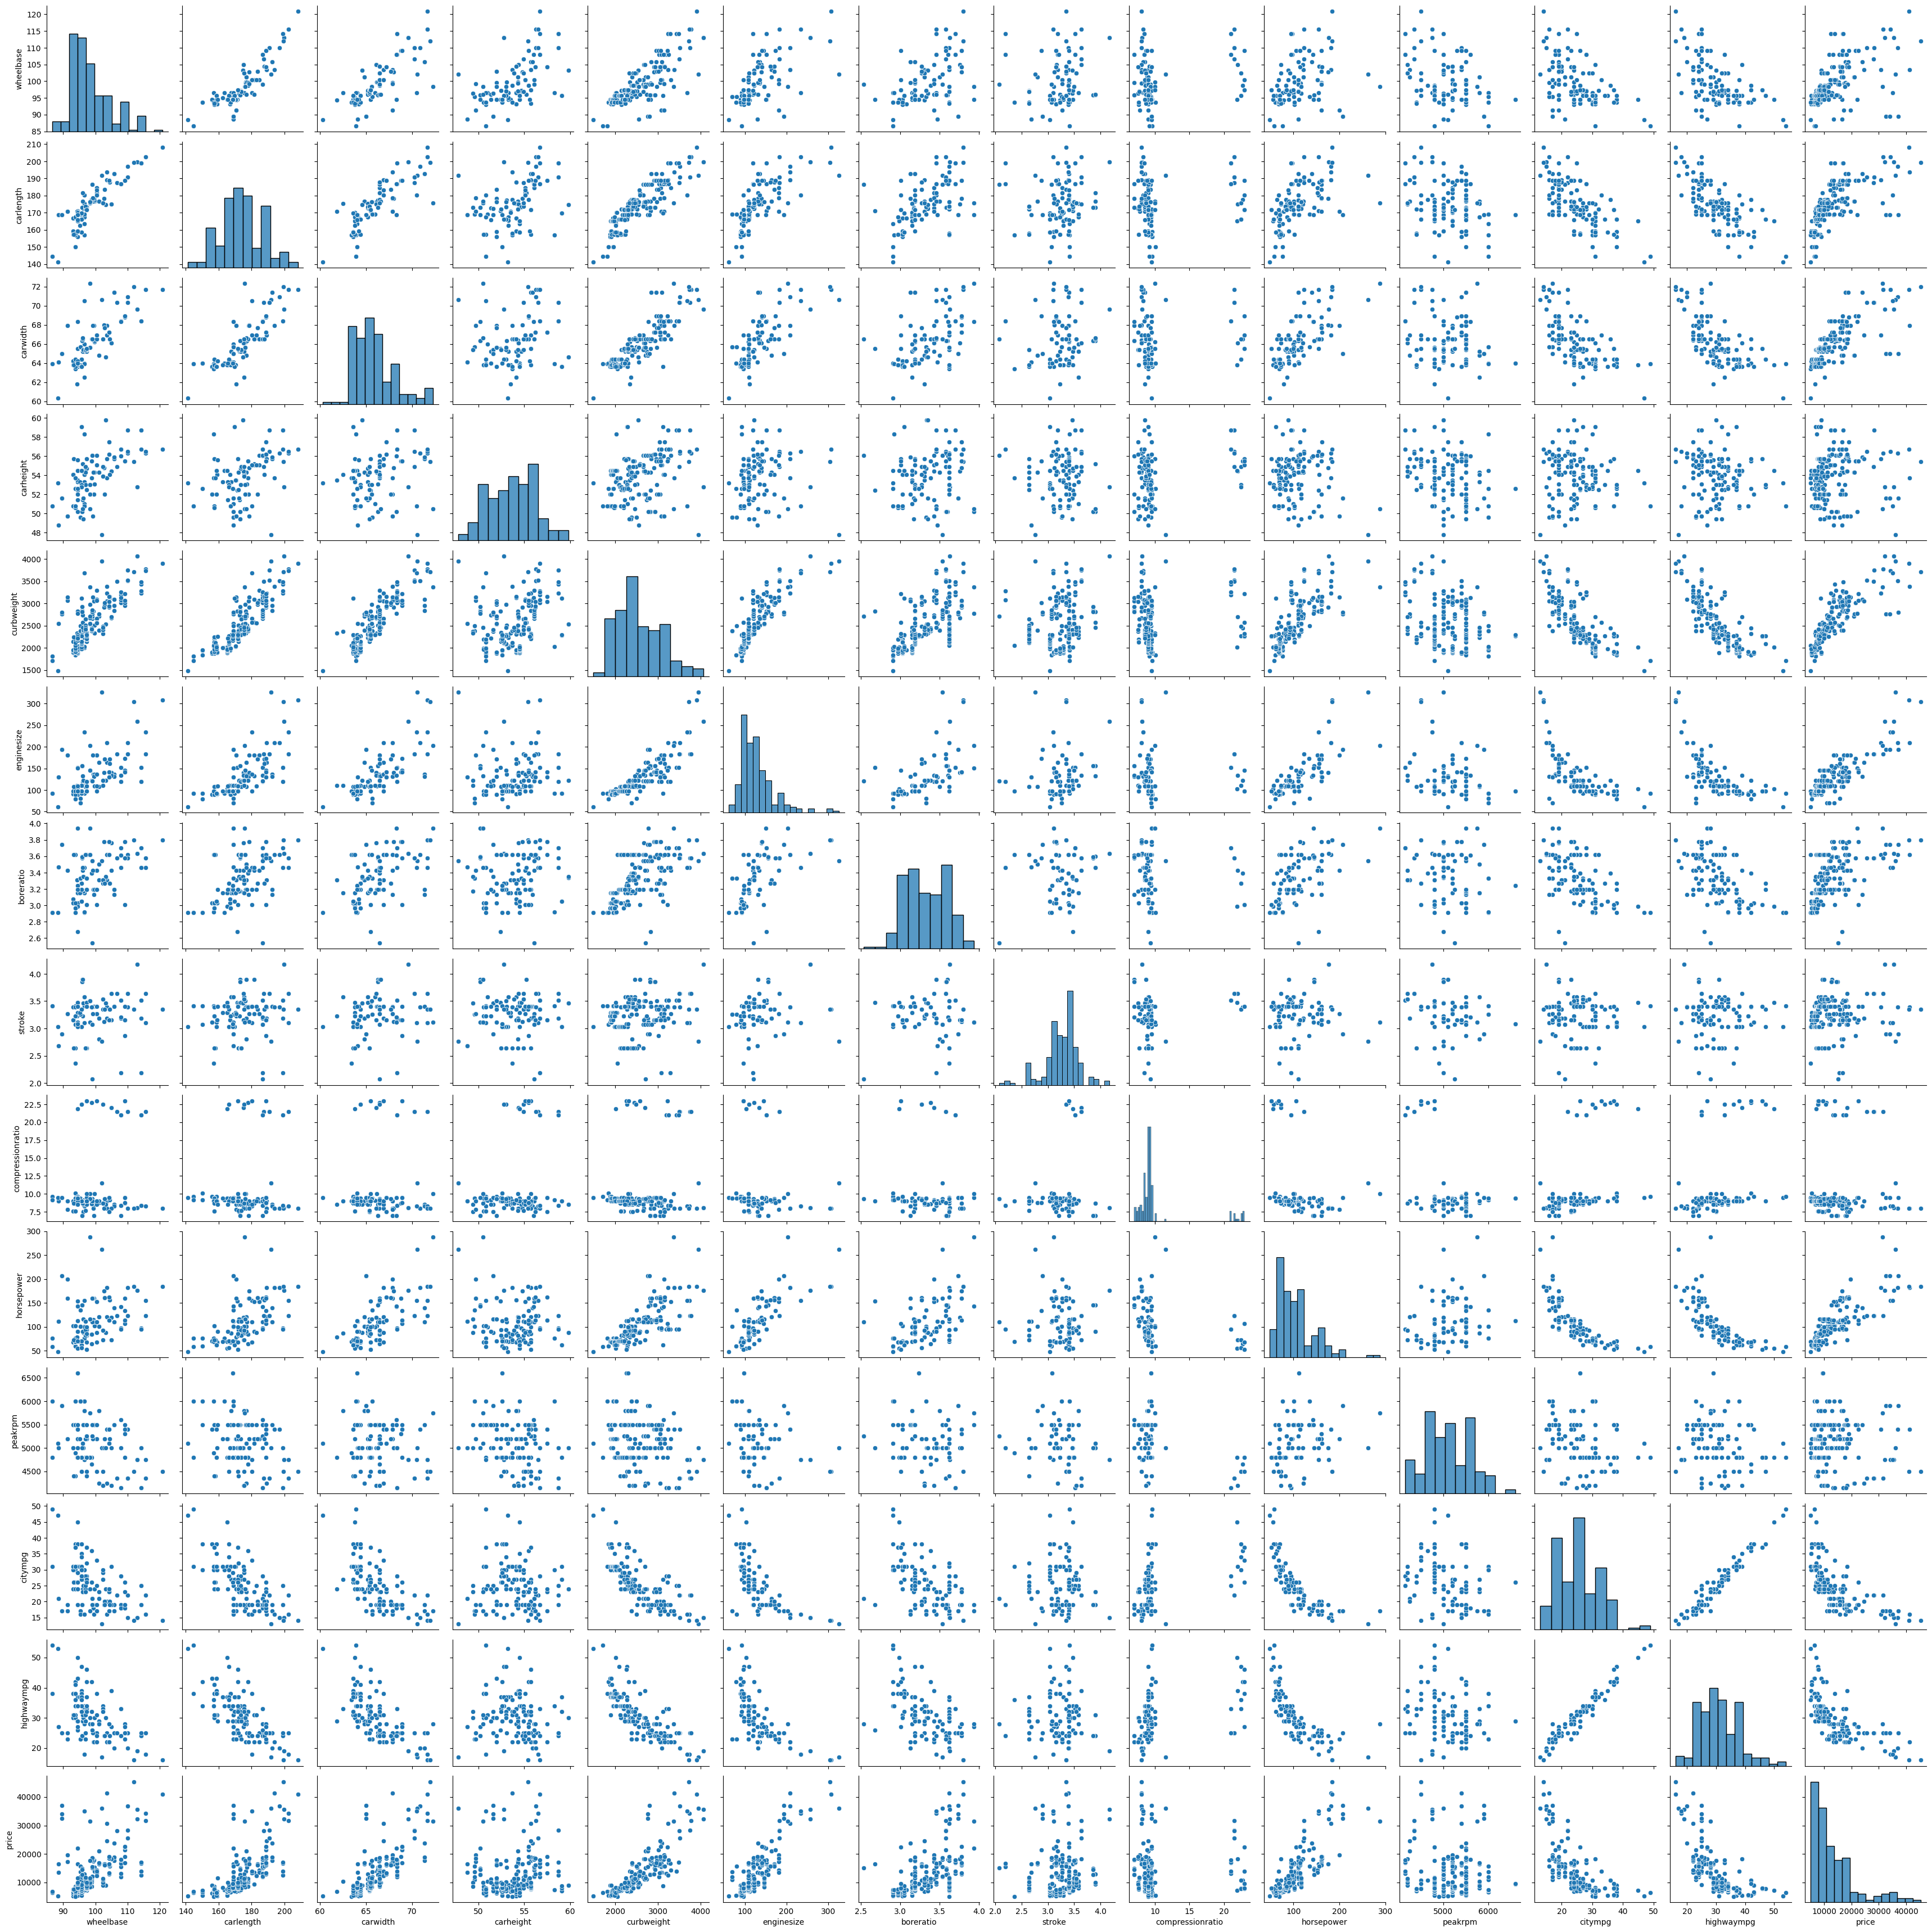

In [ ]:
cols = [ 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
sns.pairplot(df[cols])

<Axes: >

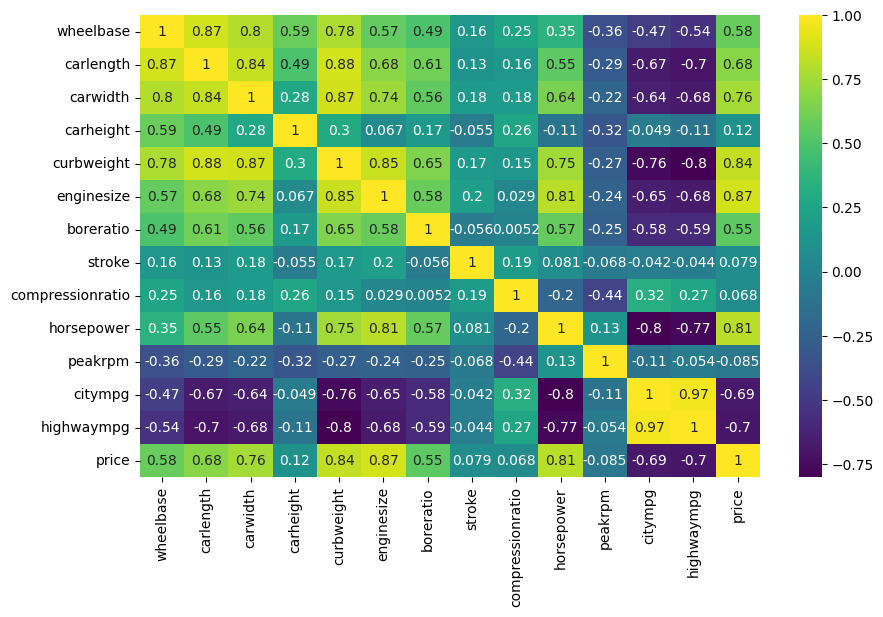

In [ ]:
cols = [ 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

<h4>Price is positively correlated with variables like engine size, horsepower, curb weight, and wheelbase.1 This suggests that cars with larger engines, more power, and heavier weight tend to be more expensive.Highway mpg is positively correlated with city mpg, indicating that cars with better fuel efficiency in the city also tend to have better fuel efficiency on the highway.
Horsepower is positively correlated with peak rpm, suggesting that cars with higher horsepower tend to have higher engine speeds.<br>Price is negatively correlated with city mpg and highway mpg. This suggests that cars with better fuel efficiency tend to be less expensive.
Horsepower is negatively correlated with city mpg and highway mpg, indicating that cars with higher horsepower tend to have lower fuel efficiency.
Peak rpm is negatively correlated with city mpg and highway mpg, suggesting that cars with higher engine speeds tend to have lower fuel efficiency.</h4>

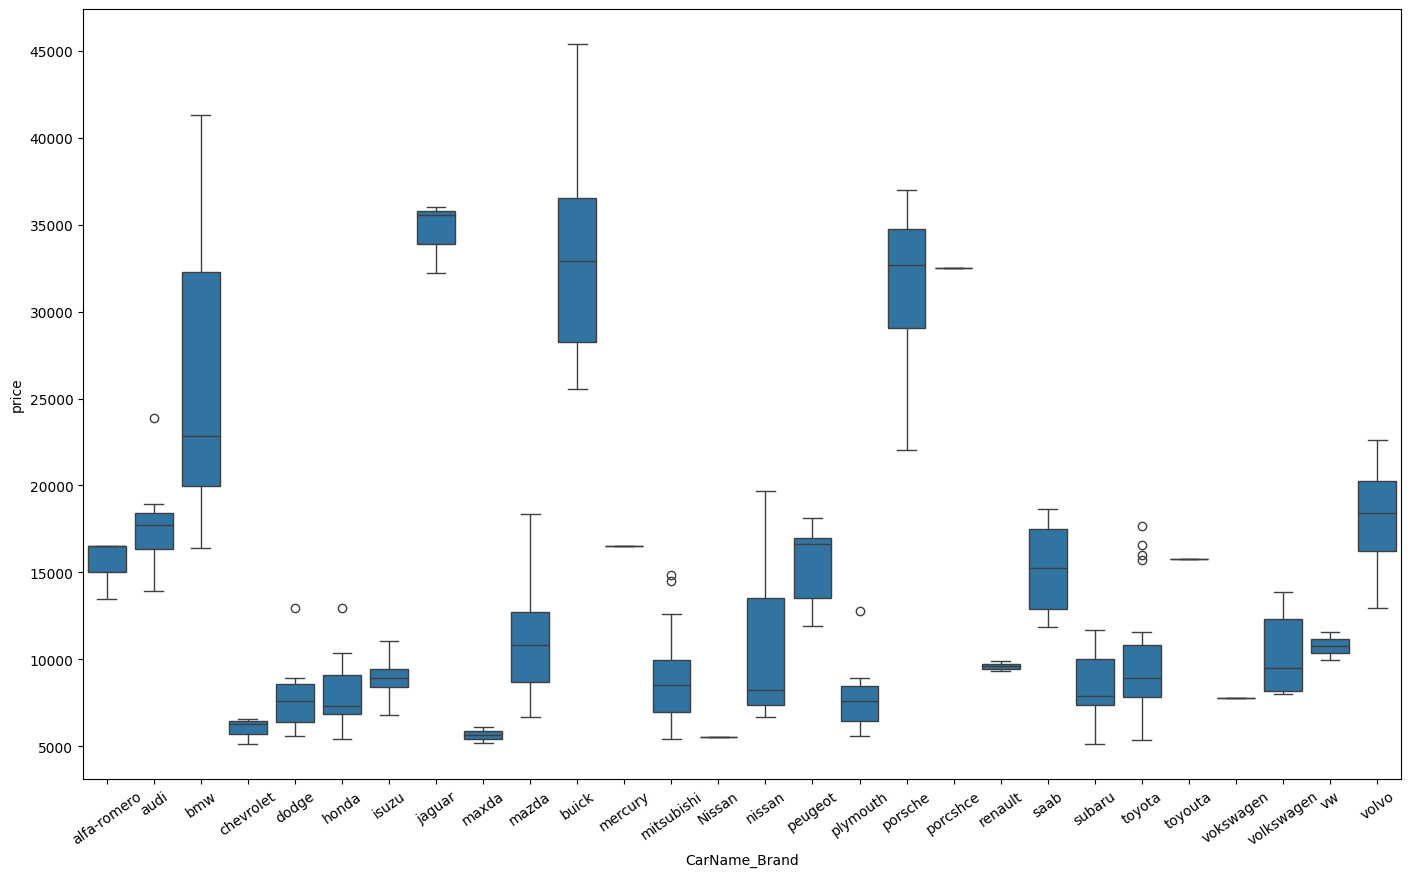

In [ ]:
plt.figure(figsize=(17, 10))
sns.boxplot(data=dfx, x='CarName_Brand', y='price')
plt.xticks(rotation=35)
plt.show()

<h4>The plot shows a wide range of car prices across different brands. Some brands, like Jaguar, Buick, and Porsche, have significantly higher prices compared to others like Chevrolet, Dodge, and Honda.Some brands have a wider range of prices (e.g., Jaguar, Buick) while others have a narrower range (e.g., Honda, Toyota).</h4>

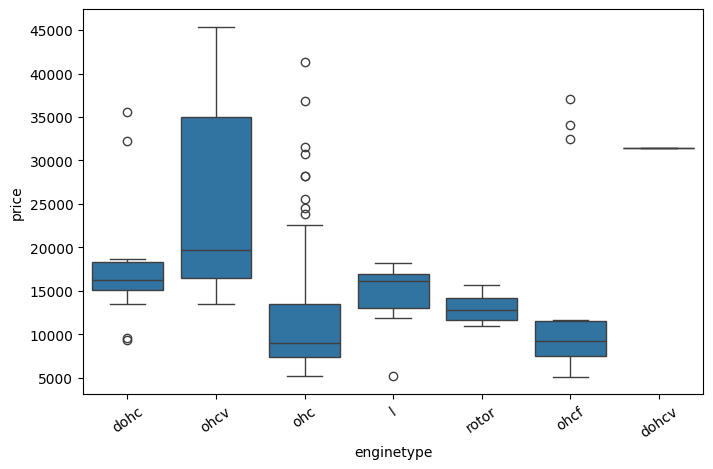

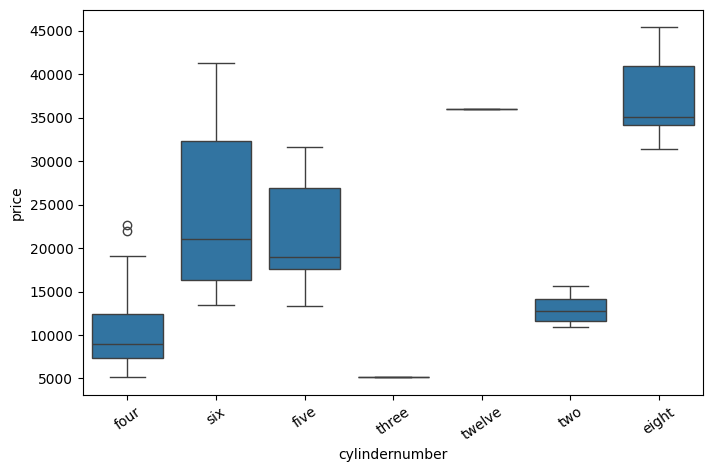

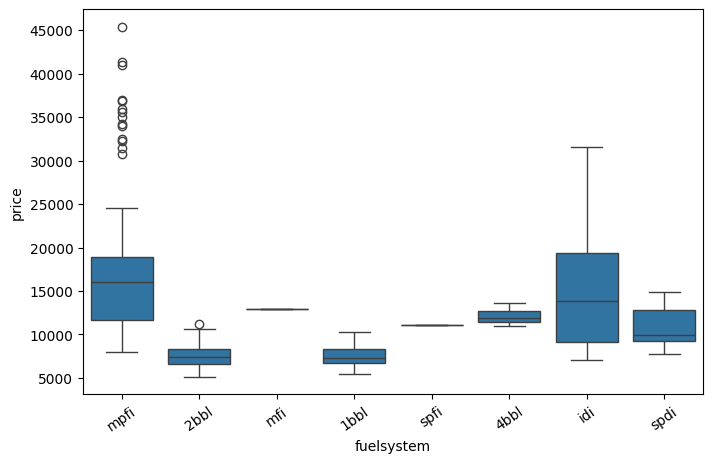

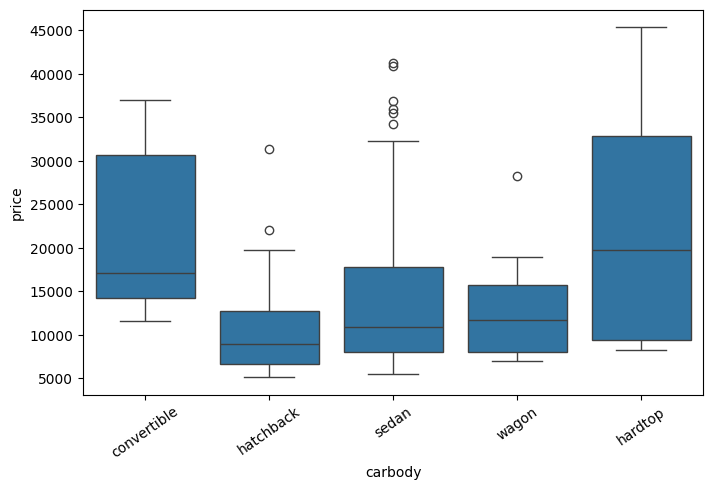

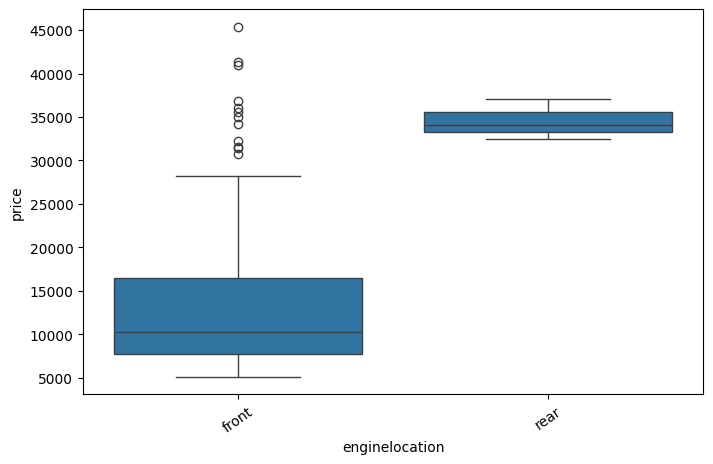

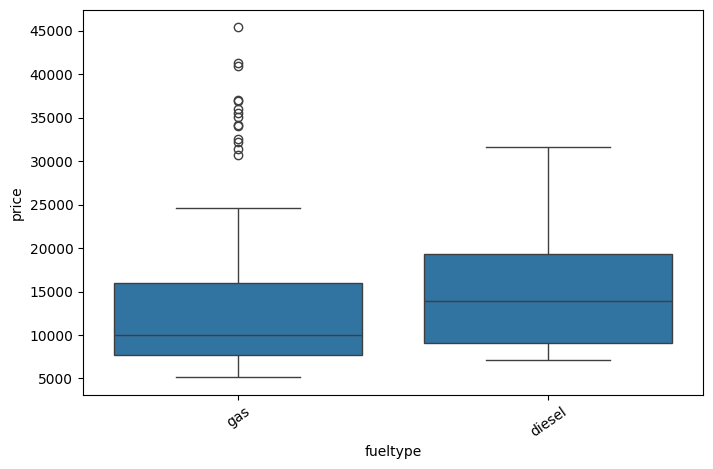

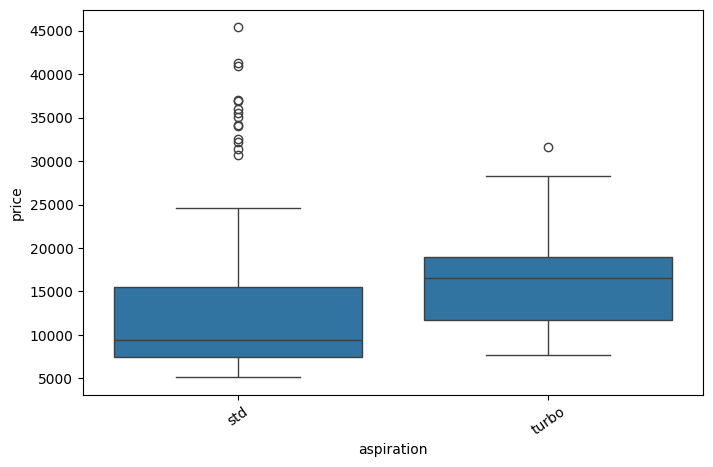

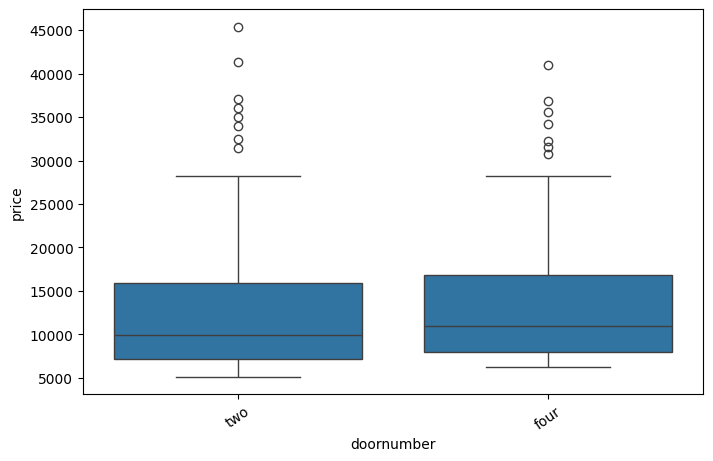

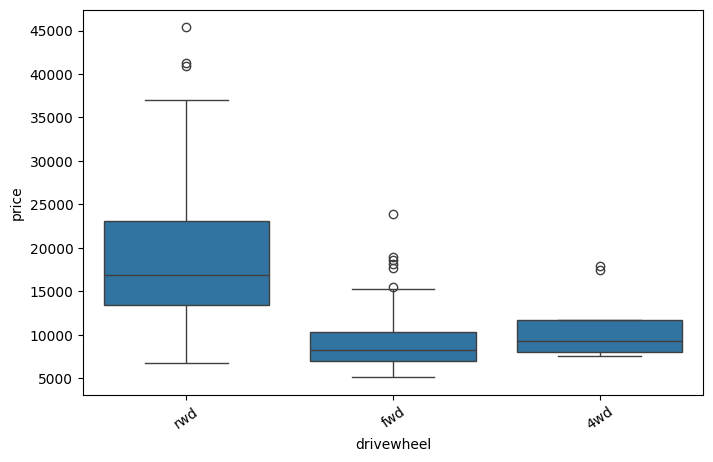

In [ ]:
cat=["enginetype", "cylindernumber", "fuelsystem" , "carbody","enginelocation", "fueltype", "aspiration", "doornumber", "drivewheel"]
for i in cat:
  plt.figure(figsize=(8, 5))
  sns.boxplot(data=dfx, x=i, y='price')
  plt.xticks(rotation=35)
  plt.show()
  print('\n')

<ul>
    <li>
        <p>The median price varies across engine types, with DOHC engines having the highest median, followed by OHC engines. The IQR, represented by the box height, shows that DOHC engines have the widest range, indicating more price variability. Several outliers (dots above and below the whiskers) are visible, indicating a few cars with unusually high or low prices. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, representing the overall price range.</p>
    </li>
     <li>
        <p>The plot shows a wide range of car prices across different cylinder numbers. Cars with eight cylinders have the highest median price, followed by twelve cylinders. Several outliers, represented by individual dots, indicate cars with unusually high prices within certain cylinder numbers. The box plots also show the distribution of prices, with some cylinder numbers having a wider price range (e.g., eight cylinders) while others have a narrower range (e.g., two cylinders).</p>
    </li>
    <li>
        <p>The plot shows a wide range of car prices across different fuel systems. Cars with "mpfi" (multi-point fuel injection) and "idi" (indirect injection) fuel systems tend to have higher median prices compared to other systems. Several outliers, represented by individual dots, indicate cars with unusually high or low prices within specific fuel systems. For instance, the "mpfi" system has a few cars with very high prices. The box heights represent the interquartile range (IQR), showing the spread of prices within the middle 50% of the data. "mpfi" and "idi" systems also show wider IQRs, suggesting a larger price range compared to other fuel systems.</p>
    </li>
     <li>
        <p>The plot shows a wide range of car prices across different body styles. Hardtops have the highest median price, followed by convertibles. Several outliers, represented by individual dots, indicate cars with unusually high prices within certain body styles. The box plots show the distribution of prices within each body style, with some body styles having a wider range of prices (e.g., hardtops) and others having a narrower range (e.g., hatchbacks).</p>
    </li>
    <li>
        <p>The plot shows a clear difference in price distribution based on engine location. Cars with rear-mounted engines have a significantly higher median price compared to those with front-mounted engines. Several outliers, represented by individual dots, indicate cars with unusually high prices, primarily among those with rear-mounted engines. The box heights represent the interquartile range (IQR), indicating the spread of prices within the middle 50% of the data. While both groups have a range, rear-mounted engines show a slightly wider IQR, suggesting a larger price range compared to front-mounted engines.</p>
    </li>
    <li>
        <p>The plot shows a wide range of car prices across different fuel types. Diesel cars have a higher median price compared to gas cars. There are several outliers, represented by individual dots, indicating cars with unusually high prices within certain fuel types. The box plots show the distribution of prices within each fuel type. Diesel cars have a wider range of prices compared to gas cars.</p>
    </li>
    <li>
        <p>The plot shows a wide range of car prices across both aspiration types. Turbo cars have a higher median price compared to standard cars. There are several outliers, represented by individual dots, indicating cars with unusually high prices within the turbo aspiration type. The box plots show the distribution of prices within each aspiration type. Turbo cars have a wider range of prices compared to standard cars.</p>
        </li>
        <li>
        <p>The plot shows a wide range of car prices across both door numbers. Four-door cars have a slightly higher median price compared to two-door cars. There are several outliers, represented by individual dots, indicating cars with unusually high prices within both door number categories. The box plots show the distribution of prices within each door number category. Both two-door and four-door cars have a similar range of prices.</p>
    </li>
     <li>
        <p>The plot shows a wide range of car prices across different drive wheel types. Rear-wheel drive (rwd) cars have the highest median price, followed by front-wheel drive (fwd) and four-wheel drive (4wd) cars. There are several outliers, represented by individual dots, indicating cars with unusually high prices within certain drive wheel types. The box plots show the distribution of prices within each drive wheel type. Rear-wheel drive cars have a wider range of prices compared to front-wheel drive and four-wheel drive cars.</p>
    </li>
</ul>

<h2>Feature Engineering</h2>

In [ ]:
dfx.drop(['car_ID'], axis=1, inplace=True)
label=["enginetype", "cylindernumber", "fuelsystem" , "CarName_Brand" , "carbody"]
onehott=["enginelocation", "fueltype", "aspiration", "doornumber", "drivewheel"]
lb=LabelEncoder()
dfx[label] = dfx[label].apply(lambda col: lb.fit_transform(col))
onehot = OneHotEncoder(sparse_output=False) # creating one hot encoder object
df_ord_onehot_part = pd.DataFrame(onehot.fit_transform(dfx[onehott]),index=dfx.index,columns=onehot.get_feature_names_out())
dfm = dfx.join(df_ord_onehot_part)
dfm.drop(columns=onehott, inplace=True)
print(dfm.head())
y=dfm['price']
X=dfm.drop(['price'],axis=1)

   symboling  carbody  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3        0       88.6      168.8      64.1       48.8        2548   
1          3        0       88.6      168.8      64.1       48.8        2548   
2          1        2       94.5      171.2      65.5       52.4        2823   
3          2        3       99.8      176.6      66.2       54.3        2337   
4          2        3       99.4      176.6      66.4       54.3        2824   

   enginetype  cylindernumber  enginesize  ...  enginelocation_rear  \
0           0               2         130  ...                  0.0   
1           0               2         130  ...                  0.0   
2           5               3         152  ...                  0.0   
3           3               2         109  ...                  0.0   
4           3               1         136  ...                  0.0   

   fueltype_diesel  fueltype_gas  aspiration_std  aspiration_turbo  \
0              0.0    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test=pd.DataFrame(sc.transform(X_test),columns=X_test.columns,index=X_test.index)
print(X_train.head())

     symboling   carbody  wheelbase  carlength  carwidth  carheight  \
66   -0.727380  0.457214   1.037085   0.072450  0.083817   0.276779   
111  -0.727380  0.457214   1.541231   1.043916  1.170268   1.207269   
153  -0.727380  1.610800  -0.508962  -0.367616 -1.097108   2.178216   
96    0.078636  0.457214  -0.710620  -0.732953 -1.002634   0.317235   
38   -0.727380 -0.696372  -0.374523  -0.550285 -0.341316  -0.168238   

     curbweight  enginetype  cylindernumber  enginesize  ...  \
66     0.281287    0.049631       -0.167093    0.188010  ...   
111    1.016045   -0.854764       -0.167093   -0.158993  ...   
153   -0.541642    0.049631       -0.167093   -0.852999  ...   
96    -1.147082    0.049631       -0.167093   -0.729070  ...   
38    -0.524008    0.049631       -0.167093   -0.406852  ...   

     enginelocation_rear  fueltype_diesel  fueltype_gas  aspiration_std  \
66             -0.136505         3.151719     -3.151719        0.463481   
111            -0.136505        -0.317

<h2>Linear Models</h2>

In [ ]:
dictxy={}
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)
score = r2_score(y_test, y_predlr)
print('The R2 score of Linear Regression: ' ,score)
print('\n')
print('The coeff are : ',lr.coef_)
dictxy['LR']= score

The R2 score of Linear Regression:  0.8486243539886235


The coeff are :  [  213.62303977 -1080.96133227  1036.02964065  -238.94240541
  1405.13766077   554.01260526   471.15929192   322.53948984
  -157.40942952  3610.21513807   263.64791003  -420.61571273
  -535.62026657  3336.95862659   690.24920468   733.57528614
 -1365.44387573  1074.80578481 -1049.11436242  -746.08581822
   746.08581822 -1479.18701838  1479.18701838  -279.03528168
   279.03528168   389.8476178   -389.8476178    172.27605481
  -470.42985728   410.97819109]


In [ ]:
RdglCV = RidgeCV(cv=5,scoring = "r2")
RdglCV.fit(X_train, y_train)
y_predrdgl = RdglCV.predict(X_test)
score = r2_score(y_test, y_predrdgl)
print('The R2 score of Ridge CV: ' ,score)
print('\n')
print('The coeff are : ',RdglCV.coef_)
dictxy['RidgeCV']= score
Lass=LassoCV(cv=5, random_state=0)
Lass.fit(X_train, y_train)
y_predlass = Lass.predict(X_test)
score = r2_score(y_test, y_predlass)
print('The R2 score of Lasso CV: ' ,score)
print('\n')
print('The coeff are : ',Lass.coef_)
dictxy['LassoCV']= score

The R2 score of Ridge CV:  0.852501164023125


The coeff are :  [ 143.80480713 -911.63889999  705.37298339  195.64464017 1310.87436076
  305.58683746  892.87470772  355.77907792 -213.67300624 2523.11182598
  151.4977577  -346.97575426 -493.5704713   621.44182444 1362.47967935
  529.12289803 -276.22415532   60.26426629 -956.81478761 -781.69707994
  781.69707994  -51.90840165   51.90840165   -5.40102701    5.40102701
  298.46491221 -298.46491221   29.80922245 -388.83062258  383.14741221]
The R2 score of Lasso CV:  0.8601210800162439


The coeff are :  [ 1.18543858e+02 -9.48260564e+02  6.16671569e+02  0.00000000e+00
  1.64462785e+03  4.74715648e+02  3.65347859e+02  2.31500324e+02
 -0.00000000e+00  3.36481830e+03  2.03851545e+02 -3.15805742e+02
 -5.81943841e+02  4.69440979e+02  1.00804266e+03  6.94066014e+02
 -1.32472216e+02  0.00000000e+00 -9.52055559e+02 -1.50492568e+03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.43925740e+02
  7.43123720e-13  6.63027287e+02 -4.99112946e-14  0.00

In [ ]:
paramsgd={
    "eta0": [0.0001,0.001,0.01,0.1],
    "alpha":[0.001,0.01,0.1,],
    "l1_ratio":[0,0.15,0.3,0.4,0.6,1]
}
sgd=SGDRegressor(loss='squared_error',penalty='elasticnet', max_iter=1000, tol=0.001, shuffle=True, epsilon=0.1,
                  random_state=43, early_stopping=True, validation_fraction=0.1, n_iter_no_change=5)
print('HYPER PARAM TUNING FOR SGD\n')
grid_search_sgd = GridSearchCV(sgd, paramsgd , cv=5, scoring ='r2', return_train_score=True)
grid_search_sgd.fit(X_train, y_train)  #(X,y)
print('best param : ',grid_search_sgd.best_params_)
y_predsgd = grid_search_sgd.best_estimator_.predict(X_test)
score = r2_score(y_test, y_predsgd)
print('\nThe R2 score of SGD : ' ,score)
print('\n')
print('The coeff are : ',grid_search_sgd.best_estimator_.coef_)
dictxy['SGD']= score

HYPER PARAM TUNING FOR SGD

best param :  {'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0}

The R2 score of SGD :  0.8491565979763844


The coeff are :  [   5.01671575 -625.11128772  616.40300328  411.32575416 1291.69839594
  209.64906717 1038.266068    297.83118015   -6.61105167 2338.60156406
   21.8372476  -358.55035949 -559.13071113  458.74242815 1688.081124
  436.35590429 -245.49333685 -194.41663138 -958.77909247 -899.37115507
  899.37115507   82.43161233  -82.43161233   80.57626036  -80.57626036
  186.5356613  -186.5356613    28.86072866  -89.90407533   80.11051787]


In [ ]:
Kernrdg = KernelRidge(alpha=1, kernel='rbf', gamma=0.1)
Kernrdg.fit(X_train, y_train)
y_predkern = Kernrdg.predict(X_test)
score = r2_score(y_test, y_predkern)
print('\nThe R2 score of Radial Basis Kernal: ' ,score)
dictxy['Kernrdg']= score


The R2 score of Radial Basis Kernal:  -0.060866433607166925


In [ ]:
ada = AdaBoostRegressor(estimator=sgd, n_estimators=150, random_state=42)
ada.fit(X_train,y_train)
ypred=ada.predict(X_test)
score = r2_score(y_test, ypred)
print('\nThe R2 score of Adaboost : ' ,score)
dictxy['AdaBoost']= score


The R2 score of Adaboost :  0.8671594141790331


In [ ]:
rf = RandomForestRegressor( n_estimators=150, random_state=42)
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)
score = r2_score(y_test, ypred)
print('\nThe R2 score of RandomForestRegressor : ' ,score)
dictxy['RandomForest']= score


The R2 score of RandomForestRegressor :  0.9553899661985049


In [ ]:
bag = BaggingRegressor(estimator=sgd, n_estimators=150, bootstrap=True, bootstrap_features=False, warm_start=False, random_state=42)
bag.fit(X_train,y_train)
ypred=bag.predict(X_test)
score = r2_score(y_test, ypred)
print('\nThe R2 score of Bagging : ' ,score)
dictxy['Bagging']= score


The R2 score of Bagging :  0.8410419308074806


In [ ]:
gd = GradientBoostingRegressor( n_estimators=150,random_state=42)
gd.fit(X_train,y_train)
ypred=gd.predict(X_test)
score = r2_score(y_test, ypred)
print('\nThe R2 score of GradiantBoostRegressor: ' ,score)
dictxy['GradientBoosting']= score


The R2 score of GradiantBoostRegressor:  0.927998975749826


<h2>Model Comparison</h2>

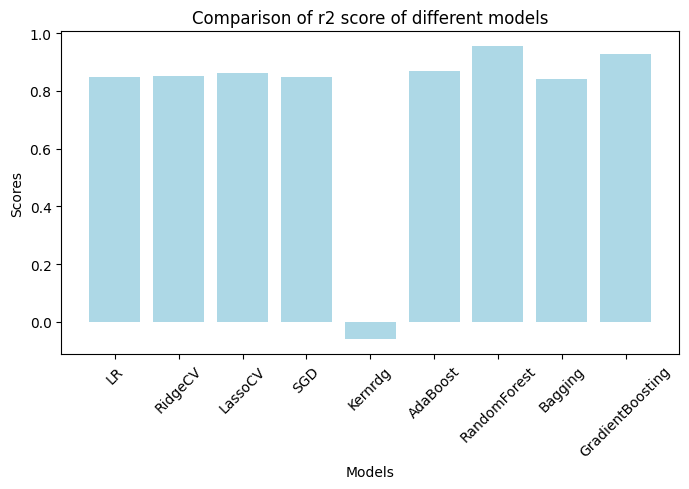

In [ ]:
plt.figure(figsize=(7, 5))
plt.bar(dictxy.keys(), dictxy.values(), color='lightblue')
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of r2 score of different models')
plt.tight_layout()
plt.show()

<h3>Performance Insights:</h3>


<p><b>Linear Regression (0.8486) performs well but is surpassed by RidgeCV (0.8525) and LassoCV (0.8601), with the latter benefiting from L1 regularization. SGD (0.8492) is similar to Linear Regression, but less effective. Radial Basis Kernel (-0.0609) underperforms. AdaBoost (0.8672) and Gradient Boosting (0.9280) show strong performance, with Gradient Boosting handling complexity well. Random Forest Regressor (0.9554) leads in performance, and Bagging (0.8410) shows moderate results.</b></p>
<br>
<h3>Project Discussion</h3>
<p><i>The dataset for this project consisted of multiple columns relevant to a regression task, specifically aimed at predicting car prices. The most challenging aspect of this task was accounting for the many deciding factors that influence car prices. These included various features like engine type, fuel system, car body, and others, each contributing differently to the final price prediction. The complexity of handling these diverse features, each with different characteristics, required a careful selection of preprocessing techniques to ensure accurate and reliable predictions

For encoding, I used Label Encoding for ordinal categorical variables such as engine type, cylinder number, and fuel system, which preserved the order inherent in these features. For other categorical variables like engine location, fuel type, aspiration, door number, and drive wheel type, I implemented One-Hot Encoding to ensure that each category was treated independently and avoid introducing any ordinal relationships.

In terms of scaling, for linear models, such as Linear Regression, RidgeCV, and LassoCV, I opted for Standard Scaling, which standardized the data to have a mean of zero and unit variance, better aligning with the assumptions of these models.

After applying the preprocessing pipeline, the models were trained and evaluated. The results indicated that the ensemble methods consistently outperformed the linear models. Specifically, models like AdaBoost, Random Forest, and Gradient Boosting exhibited superior performance in terms of predictive accuracy. This performance gap highlights the power and flexibility of ensemble techniques in handling datasets with diverse feature types, where linear models tend to struggle due to their assumptions about data distributions.

In conclusion, the tailored preprocessing approach, combined with the appropriate scaling and encoding techniques, enabled effective handling of the dataset. The boosting and Bagging models proved to be the most robust and adaptable, demonstrating the advantages of ensemble methods in complex predictive modeling tasks..</i></p>

<h3>NAME - SUNEHA DATTA<br>
MENTOR - Subhra Prakash Mondal <br>